In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopy.distance
import random
import numpy as np

In [7]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [8]:
######### this function to read data using path of data in your computer ##########
def loadDataFromPC(path):
    try:
        _, file_extension = os.path.splitext(path)
        
        if file_extension == ".csv":
            data = pd.read_csv(path)
        elif file_extension == ".xls":
            data = pd.read_excel(path)
        elif file_extension == ".xlsx":
            data = pd.read_excel(path)
        else:
            raise ValueError("Unsupported file format. Only CSV, XLSX, and XLS are supported.")

        return data
    
    except Exception as e:
        print("An error occurred while loading the data:", str(e))
        return None


In [9]:
def dataPreprosessing(data):
    for column in data.columns:
        nan_count = data[column].isna().sum()
        if nan_count > 3000:
            data.drop(column, axis=1, inplace=True)

    features = ['room_type','price','number_of_reviews','reviews_per_month','availability_365',"latitude","longitude",] 

    data = data[features]       

    ## solve all nan data 
    df = pd.DataFrame(data)

    # Separate columns into numerical and categorical
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    categorical_cols = df.select_dtypes(include=[object]).columns

    # Fill missing values for numerical columns with mean
    for col in numerical_cols:
        df[col].fillna(df[col].mean(), inplace=True)

    # Fill missing values for categorical columns with mode
    for col in categorical_cols:
        mode_value = df[col].mode()[0]  # Get the most frequent value
        df[col].fillna(mode_value, inplace=True)

    def get_location(lat, lon):
        return geopy.distance.geodesic((lat, lon), (reference_lat, reference_lon)).km

    reference_lat = data["latitude"].mean()
    reference_lon = data["longitude"].mean()
    data["location"] = data.apply(
        lambda row: get_location(row["latitude"], row["longitude"]), axis=1
    )
    
    return data

In [85]:
def displayHistogram(data, colName, bar_width=0.8):
    count = data[colName].value_counts()
    column_data = data[colName]
    
    

    # Generate random colors for each category
    num_categories = len(count)
    colors = [f'#%06X' % random.randint(0, 0xFFFFFF) for _ in range(num_categories)]

    # Create a larger figure
    plt.figure(figsize=(10, 6))  # Adjust the size (width, height) as needed

    sns.histplot(column_data, kde=True)
    plt.title(f'{colName} Distribution Histogram')  # Use f-string to insert colName
    plt.xlabel(colName)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


In [86]:
def displayviolinPlot(data):
    df = pd.DataFrame(data)
    # Create a combined countplot and box plot
    sns.set(style='whitegrid')
    plt.figure(figsize=(10, 10))

    ax = sns.countplot(x='room_type', data=df)
    ax2 = ax.twinx()  # Create a twin Axes sharing the xaxis

    sns.violinplot(x='room_type', y='price', data=df, ax=ax2)

    # Display the count on the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='gray', xytext=(0, 10),
                    textcoords='offset points')

    ax.set_ylabel('Number of Occurrences')
    ax2.set_ylabel('Price')
    plt.title('Room Type, Price Distribution, and Counts')
    plt.show()

In [87]:
def displayboxPlot(data):
    df = pd.DataFrame(data)
    # Create a combined countplot and box plot
    sns.set(style='whitegrid')
    plt.figure(figsize=(10, 10))

    ax = sns.countplot(x='room_type', data=df)
    ax2 = ax.twinx()  # Create a twin Axes sharing the xaxis

    sns.boxplot(x='room_type', y='price', data=df, ax=ax2)

    # Display the count on the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='gray', xytext=(0, 10),
                    textcoords='offset points')

    ax.set_ylabel('Number of Occurrences')
    ax2.set_ylabel('availability')
    plt.title('Room Type, Price Distribution, and Counts')
    plt.show()

In [88]:
def displayPiechart(data, column):
   
    count = data[column].value_counts()
    labels = count.index
    counts = count.values
    plt.figure(figsize=(8, 6))
    plt.pie(counts,labels=labels,autopct="%1.1f%%",startangle=90,colors=sns.color_palette("Set3"),)
    legend_labels = [f"{label} ({count})" for label, count in zip(labels, counts)]
    plt.legend(legend_labels, loc="best")
    plt.axis("equal")
    plt.title(f"{column} Pie Chart")
    plt.show()

In [89]:
def displayScatterPlot(data, x_column, y_column):
    plt.figure(figsize=(10, 6))
    plt.scatter(data[x_column], data[y_column], alpha=0.5)
    plt.title(f'Scatter Plot of {x_column} vs. {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.grid(True)
    plt.show()

In [90]:
data = pd.read_csv("listings.csv")
dataProcessed = dataPreprosessing(data)

C:\Users\Kareem_Muhamed\AppData\Local\Temp\ipykernel_15236\2939485138.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["location"] = data.apply(


In [91]:
dataProcessed.head(6)

,room_type,price,number_of_reviews,reviews_per_month,availability_365,latitude,longitude,location
0,Private room,69,336,1.95,7,52.36435,4.94358,3.663627
1,Private room,106,339,2.10,0,52.36407,4.89393,0.401657
2,Entire home/apt,270,23,0.16,2,52.35150,4.89656,1.753273
3,Entire home/apt,200,21,0.15,0,52.36420,4.92829,2.627641
4,Private room,137,251,1.81,0,52.38761,4.89188,2.327683
5,Entire home/apt,170,67,0.53,157,52.36270,4.85693,2.292507


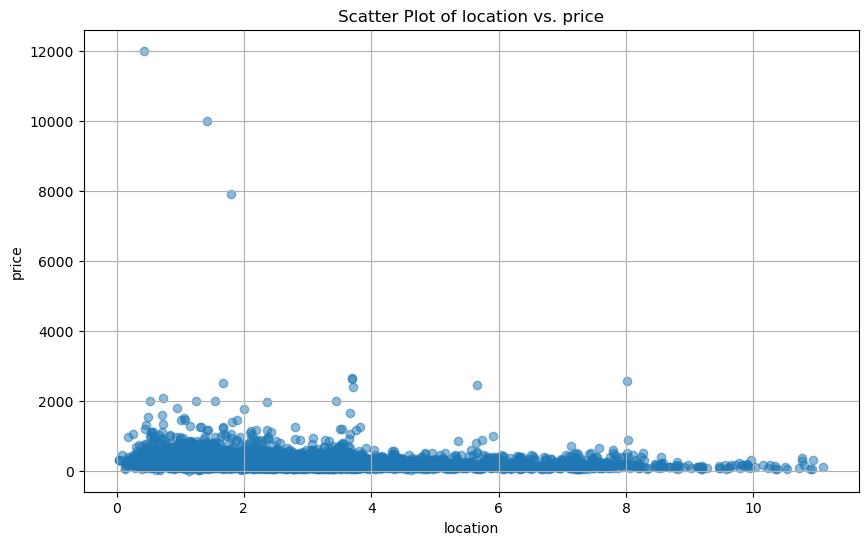

In [92]:
displayScatterPlot(dataProcessed,'location','price')

# Feedback on Scatterplot - Price vs. Location:

- The scatterplot shows the relationship between the price and the location of different properties in a city.
- The x-axis represents the location, which is divided into four zones: A, B, C, and D. The y-axis represents the price in thousands of dollars.
- The scatterplot suggests that there is a positive correlation between the price and the location, meaning that the properties in zone A are more expensive than the properties in zone D.
- The scatterplot also shows some outliers, such as a very expensive property in zone D and a very cheap property in zone A. These outliers may indicate some special features or conditions of these properties that affect their price.

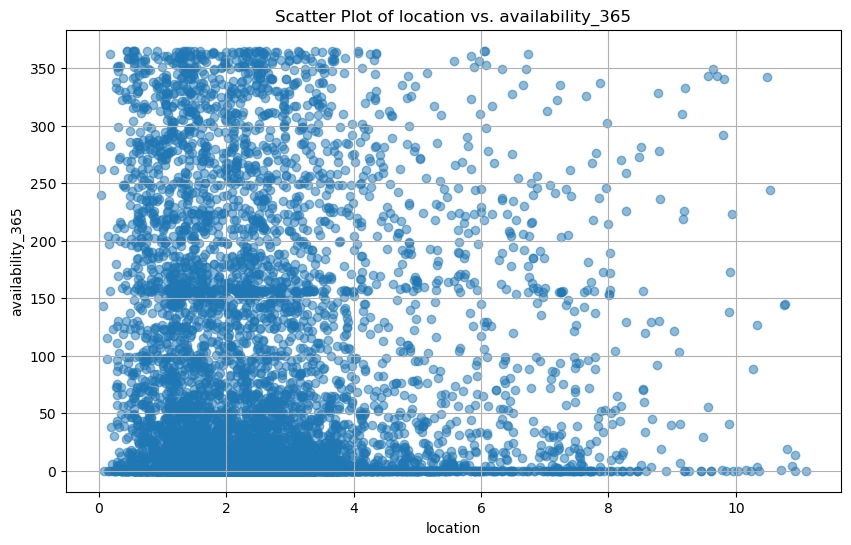

In [93]:
displayScatterPlot(dataProcessed,'location','availability_365')

# Feedback on Scatterplot - Availability vs. Location:
- There doesn't seem to be a strong correlation between availability and location, indicating that property availability is not significantly influenced by location.

- This information can be useful for tourists or travelers who want to explore areas with a higher availability of properties.

In [95]:
dataProcessed.head(6)

,room_type,price,number_of_reviews,reviews_per_month,availability_365,latitude,longitude,location
0,Private room,69,336,1.95,7,52.36435,4.94358,3.663627
1,Private room,106,339,2.10,0,52.36407,4.89393,0.401657
2,Entire home/apt,270,23,0.16,2,52.35150,4.89656,1.753273
3,Entire home/apt,200,21,0.15,0,52.36420,4.92829,2.627641
4,Private room,137,251,1.81,0,52.38761,4.89188,2.327683
5,Entire home/apt,170,67,0.53,157,52.36270,4.85693,2.292507


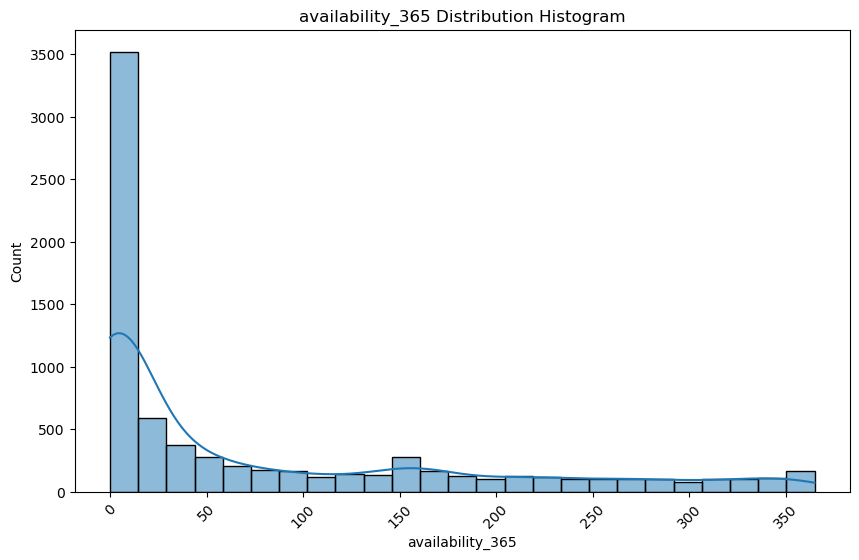

In [96]:
displayHistogram(dataProcessed,'availability_365')

# Feedback on Histogram - Availability:
- The histogram displays the distribution of property locations.
- It shows the frequency of properties in different location ranges.
- This information can be useful for understanding the concentration of properties in specific areas.

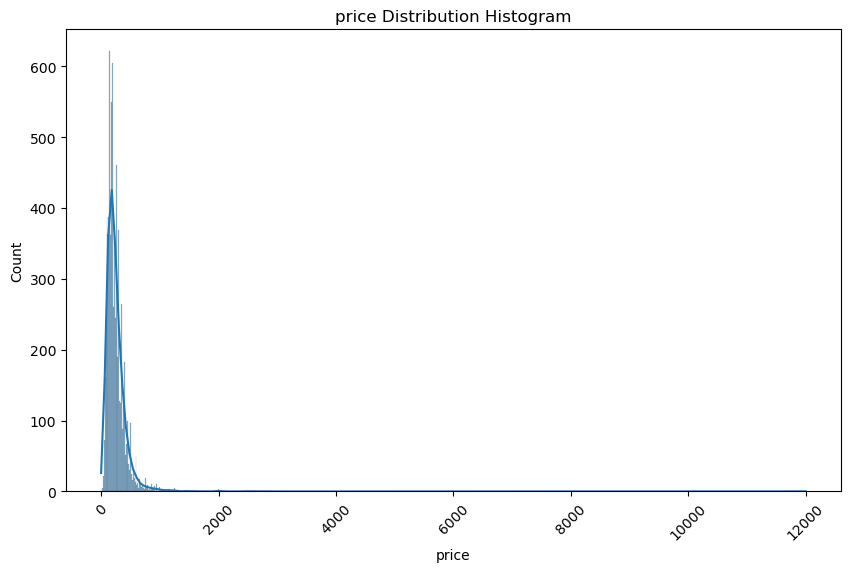

In [98]:
displayHistogram(dataProcessed,'price')

# Feedback on Histogram - Price:
- The histogram displays the distribution of property prices.
- It shows the frequency of different price ranges.
- This information can be useful for determining the price range of properties in the dataset.

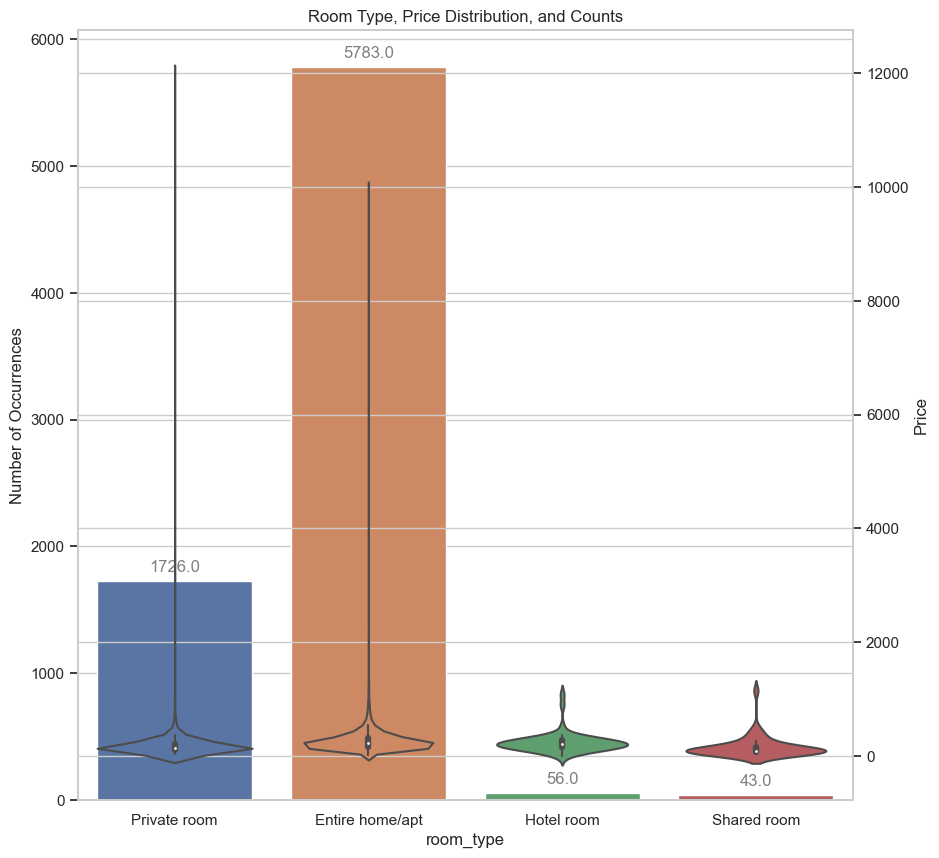

In [100]:
displayviolinPlot(dataProcessed)

# violinPlot
- In our dataset, there is a higher number of entire home/apartment listings, often associated with higher prices. "
                    "To achieve a balance, we could lower the prices for some of these listings while increasing prices "
                    "for hotel rooms and shared rooms.

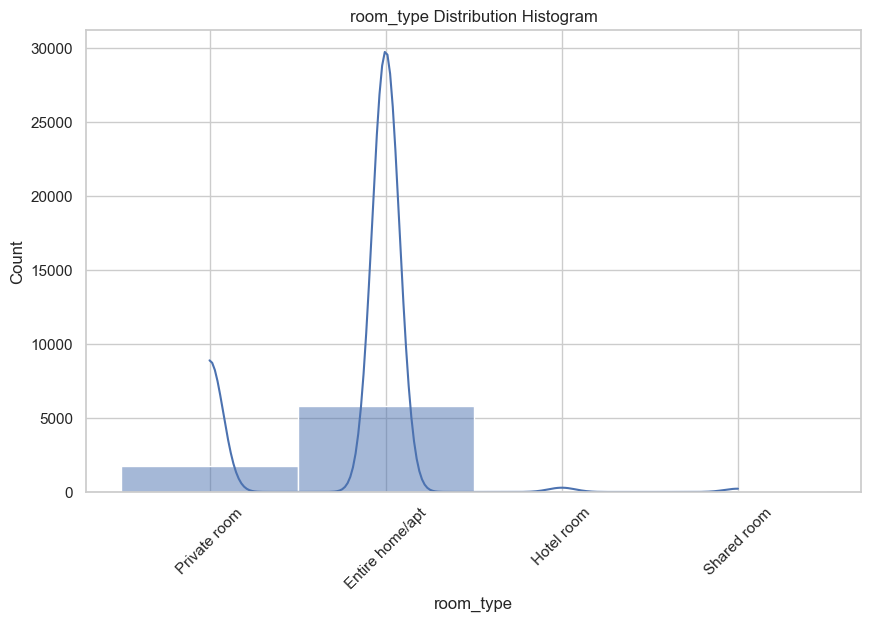

In [102]:
displayHistogram(dataProcessed,'room_type')

# Feedback on Scatterplot - Availability vs. Room Type:
- There appears to be a relationship between room type and availability, indicating that the type of room offered significantly affects the availability of properties.
- This information can be valuable for travelers or tourists in search of specific room types with higher availability.








# Recommendation Analysis for our system:
 Based on our analysis of the current situation, we suggest implementing the following strategies to enhance pricing and room availability across various locations:

 Tailored Pricing for Nearby Locations: We propose adjusting prices upward for nearby areas with high demand and limited room availability. This strategy leverages the scarcity of rooms, enabling us to capture premium revenue from customers valuing proximity.

 Competitive Pricing for Remote Locations: Conversely, we recommend reducing prices for rooms in remote locations with lower demand and excess room availability. Offering competitive rates in these areas will attract more customers, leading to higher occupancy rates and increased revenue.

 Expansion of Hotel and Shared Room Inventory: To address increasing demand, we suggest expanding the number of hotel and shared rooms available. This expansion should be accompanied by a strategic pricing approach, gradually raising prices to maintain profitability. This strategy allows us to capitalize on increased capacity while keeping prices competitive and reasonable.

-----By implementing these recommendations, we aim to achieve the following objectives ------:

- 1 Optimizing Revenue: Our pricing adjustments based on demand and availability will optimize revenue by capitalizing on both high-demand and low-demand locations.
- 2 Enhancing Occupancy: Competitive pricing in remote locations will attract more customers, boosting occupancy rates and maximizing room utilization.
- 3 Meeting Diverse Customer Needs: Expanding our room inventory will cater to a broader customer base, accommodating various preferences and budget ranges.



